In [8]:
import pandas as pd
!pip install matplotlib

  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 20.1 MB/s eta 0:00:0000:0100:01
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 18.8 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.3/64.3 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.1/104.1 kB 9.9 MB/s eta 0:00:00


In [13]:
pd_df = pd.read_csv("/Users/swarchol/Research/exemplar-001/quantification/exemplar-001--unmicst_cell_umap.csv")


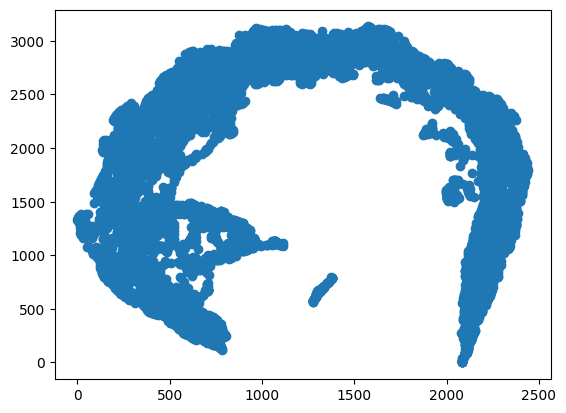

In [15]:
# plot UMAP_X and UMAP_Y
import matplotlib.pyplot as plt
plt.scatter(pd_df["UMAP_X"], pd_df["UMAP_Y"])

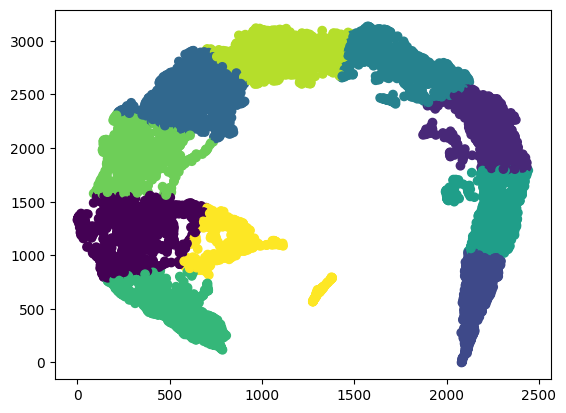

In [39]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=10, random_state=0, n_init="auto").fit(pd_df[["UMAP_X","UMAP_Y"]].values)
kmeans.labels_
plt.scatter(pd_df["UMAP_X"], pd_df["UMAP_Y"], c=kmeans.labels_)


kmeans_label_strings = kmeans.labels_.astype(str)
kmeans_label_strings = ["Kluster " + str(i) for i in kmeans_label_strings]
pd_df['kmeans']= kmeans_label_strings

10


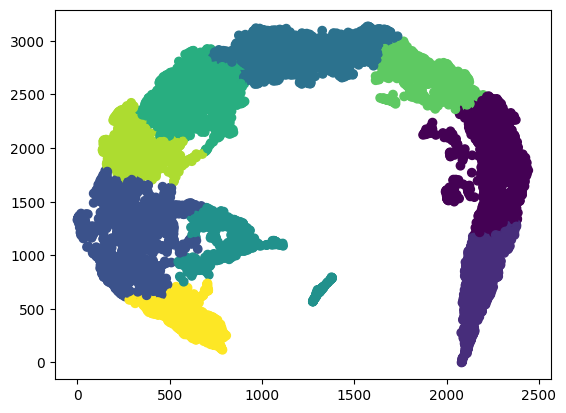

In [40]:
from sklearn.cluster import AgglomerativeClustering
import numpy as np
hdbsc = AgglomerativeClustering(n_clusters=9).fit(pd_df[["UMAP_X","UMAP_Y"]].values)
hdbsc.labels_
plt.scatter(pd_df["UMAP_X"], pd_df["UMAP_Y"], c=hdbsc.labels_+1)
# Print number of unique clusters
print(len(np.bincount(hdbsc.labels_+1)))
kmeans_label_strings = hdbsc.labels_.astype(str)

kmeans_label_strings = ["Cluster " + str(i) for i in kmeans_label_strings]
pd_df['agcluster']= kmeans_label_strings

In [41]:
pd_df.head()

,CellID,DNA_6,ELANE,CD57,CD45,DNA_7,CD11B,SMA,CD16,DNA_8,...,MajorAxisLength,MinorAxisLength,Eccentricity,Solidity,Extent,Orientation,UMAP_X,UMAP_Y,kmeans,agcluster
0,1,17597.443478,1176.791304,160.782609,703.991304,5866.643478,377.400000,245.260870,331.278261,6816.017391,...,12.375868,11.823117,0.295521,0.966387,0.798611,-1.104797,327.25260,1908.15170,Kluster 7,Cluster 7
1,2,18031.086957,1125.282609,176.934783,792.826087,11817.923913,910.304348,422.347826,646.923913,13424.717391,...,11.874070,9.982065,0.541562,0.948454,0.696970,-0.435290,1053.62210,2892.14280,Kluster 8,Cluster 3
2,3,8402.596774,1249.532258,156.951613,816.225806,5040.790323,1046.177419,487.854839,601.790323,5557.935484,...,9.995049,8.673949,0.496871,0.837838,0.563636,1.355995,567.81900,323.46994,Kluster 6,Cluster 8
3,4,22322.404412,1156.683824,187.330882,853.250000,13716.878676,816.955882,2187.911765,376.194853,15479.356618,...,25.566077,15.136434,0.805900,0.834356,0.537549,-0.709765,1749.18660,2781.72360,Kluster 4,Cluster 6
4,5,8101.017199,1570.628993,163.009828,318.027027,4959.896806,826.963145,361.771499,366.088452,5628.589681,...,26.723557,19.630426,0.678529,0.933486,0.707826,-0.719601,578.08105,272.41492,Kluster 6,Cluster 8


In [42]:
pd_df.to_csv("/Users/swarchol/Research/exemplar-001/quantification/exemplar-001--unmicst_cell_umap_clusters.csv", index=False)